In [1]:
import pandas as pd
import re
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ct_data/ACSDP5YSPT2010.DP03-Data.csv",skiprows=[1], low_memory=False)

In [3]:
col_names = pd.Series(df.columns)
useful_idx = ["GEO_ID"]
useful_idx.extend(col_names[col_names.apply(lambda x: x[-1]=="E")])
for metric in useful_idx:
    if df[metric][0] == '(X)' and len(np.unique(df[metric])) == 1:
        useful_idx.remove(metric)

In [4]:
useful_idx

['GEO_ID',
 'NAME',
 'DP03_0001E',
 'DP03_0001PE',
 'DP03_0002E',
 'DP03_0002PE',
 'DP03_0003E',
 'DP03_0003PE',
 'DP03_0004E',
 'DP03_0004PE',
 'DP03_0005E',
 'DP03_0005PE',
 'DP03_0006E',
 'DP03_0006PE',
 'DP03_0007E',
 'DP03_0007PE',
 'DP03_0008E',
 'DP03_0008PE',
 'DP03_0009PE',
 'DP03_0010E',
 'DP03_0010PE',
 'DP03_0011E',
 'DP03_0011PE',
 'DP03_0012E',
 'DP03_0012PE',
 'DP03_0013E',
 'DP03_0013PE',
 'DP03_0014E',
 'DP03_0014PE',
 'DP03_0015E',
 'DP03_0015PE',
 'DP03_0016E',
 'DP03_0016PE',
 'DP03_0017E',
 'DP03_0017PE',
 'DP03_0018E',
 'DP03_0018PE',
 'DP03_0019E',
 'DP03_0019PE',
 'DP03_0020E',
 'DP03_0020PE',
 'DP03_0021E',
 'DP03_0021PE',
 'DP03_0022E',
 'DP03_0022PE',
 'DP03_0023E',
 'DP03_0023PE',
 'DP03_0024E',
 'DP03_0024PE',
 'DP03_0025E',
 'DP03_0026E',
 'DP03_0026PE',
 'DP03_0027E',
 'DP03_0027PE',
 'DP03_0028E',
 'DP03_0028PE',
 'DP03_0029E',
 'DP03_0029PE',
 'DP03_0030E',
 'DP03_0030PE',
 'DP03_0031E',
 'DP03_0031PE',
 'DP03_0032E',
 'DP03_0032PE',
 'DP03_0033E',
 'DP

In [5]:
df = df[useful_idx]

In [6]:
df["GEO_ID"] = df["GEO_ID"].apply(lambda x:x[-11:])

In [7]:
df

,GEO_ID,NAME,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,DP03_0128PE,DP03_0129PE,DP03_0130PE,DP03_0131PE,DP03_0132PE,DP03_0133PE,DP03_0134PE,DP03_0135PE,DP03_0136PE,DP03_0137PE
0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,45.0,...,3.6,4.2,4.2,2.1,4.8,3.5,5.3,0.0,2.4,12.2
1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,49.1,...,12.7,18.1,17.6,11.4,19.7,11.4,12.7,7.1,9.2,27.6
2,55001950202,"Census Tract 9502.02, Adams County, Wisconsin",2339,2339,1179,50.4,1168,49.9,1056,45.1,...,13.8,33.2,30.6,23.1,32.5,10.4,12.7,4.9,12.2,20.6
3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,48.3,...,18.3,26.4,26.4,42.4,18.1,16.3,18.8,9.4,14.3,30.4
4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,47.1,...,9.4,13.3,13.3,50.0,8.3,8.7,10.0,6.3,5.8,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,56.2,...,5.1,1.5,1.5,0.0,1.9,5.9,3.5,12.0,1.6,17.3
1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,49.2,...,7.6,13.8,12.0,4.6,14.2,5.7,5.7,5.8,6.5,11.9
1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,66.9,...,1.1,1.5,0.0,0.0,0.0,0.9,0.8,1.8,0.0,10.3
1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,59.7,...,3.8,0.9,0.9,0.0,1.1,4.7,3.1,11.3,2.9,10.5


In [8]:
geo = gpd.read_file("zip://ct_data/tl_2019_55_tract.zip")

In [9]:
joined = gpd.GeoDataFrame(pd.merge(df,geo,how="left",left_on="GEO_ID",right_on = "GEOID"))

In [10]:
joined

,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,45.0,...,55001950100,9501,Census Tract 9501,G5020,S,233951801,17547549,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194..."
1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,49.1,...,55001950201,9502.01,Census Tract 9502.01,G5020,S,110142594,7642055,+44.0031471,-089.8876764,"POLYGON ((-90.01877 44.04772, -90.01870 44.048..."
2,55001950202,"Census Tract 9502.02, Adams County, Wisconsin",2339,2339,1179,50.4,1168,49.9,1056,45.1,...,55001950202,9502.02,Census Tract 9502.02,G5020,S,467891428,50528185,+44.0888085,-089.7705744,"POLYGON ((-90.02638 44.08721, -90.02627 44.089..."
3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,48.3,...,55001950400,9504,Census Tract 9504,G5020,S,235590227,1195071,+43.9407474,-089.7376994,"POLYGON ((-89.93773 43.96629, -89.93738 43.966..."
4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,47.1,...,55001950501,9505.01,Census Tract 9505.01,G5020,S,114019282,19754029,+43.8817191,-089.8962390,"POLYGON ((-89.98419 43.91181, -89.98397 43.913..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,56.2,...,55141011300,113,Census Tract 113,G5020,S,12013212,1425599,+44.3643651,-089.8372719,"POLYGON ((-89.85937 44.36194, -89.85928 44.362..."
1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,49.2,...,55141011400,114,Census Tract 114,G5020,S,11657150,341824,+44.3673095,-089.8033856,"POLYGON ((-89.81719 44.38606, -89.81718 44.386..."
1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,66.9,...,55141011500,115,Census Tract 115,G5020,S,33527893,605288,+44.3654643,-089.7591255,"POLYGON ((-89.80564 44.34373, -89.80245 44.347..."
1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,59.7,...,55141011600,116,Census Tract 116,G5020,S,128689803,4188672,+44.2849618,-089.7980036,"POLYGON ((-89.91256 44.27344, -89.91253 44.273..."


<AxesSubplot:>

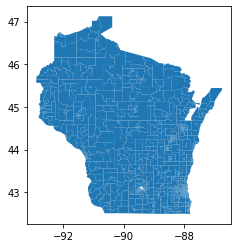

In [11]:
joined[joined["geometry"].notnull()].plot()

In [12]:
joined[joined["geometry"].isnull()]

,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry


In [13]:
joined2 = pd.merge(geo,df,how="left",left_on="GEOID",right_on = "GEO_ID")

<AxesSubplot:>

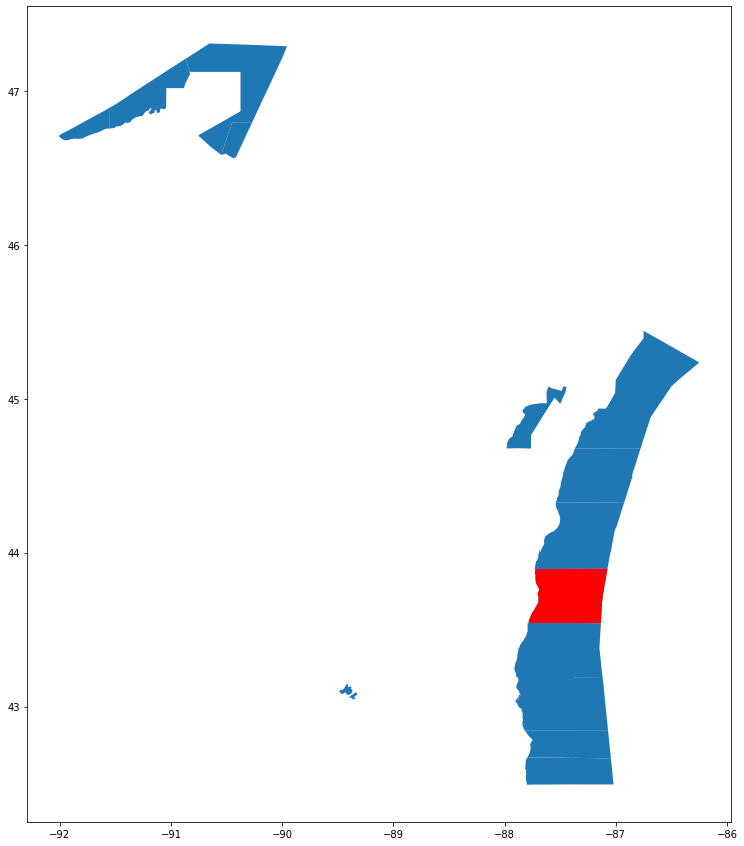

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
joined2[joined2["DP03_0133PE"].isnull()].plot(ax=ax)
joined2[(joined2["GEOID"].str.startswith("55117")) &(joined2["DP03_0133PE"].isnull())].plot(color="red",ax=ax)

In [15]:
not_joined_attr = joined[(joined["geometry"].isnull())]
not_joined_geo = joined2[(joined2["DP03_0133PE"].isnull())]

In [16]:
joined2[(joined2["GEOID"].str.startswith("55117")) &(joined2["DP03_0133PE"].isnull())][:-1]

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,DP03_0128PE,DP03_0129PE,DP03_0130PE,DP03_0131PE,DP03_0132PE,DP03_0133PE,DP03_0134PE,DP03_0135PE,DP03_0136PE,DP03_0137PE


In [17]:
joined[(joined["GEO_ID"].str.startswith("55117")) & (joined["geometry"].isnull())]

,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry


<AxesSubplot:>

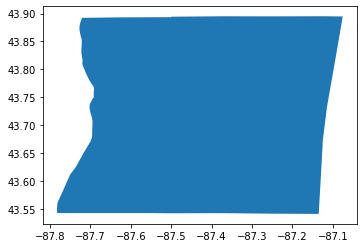

In [18]:
joined2[(joined2["GEOID"].str.startswith("55117")) &(joined2["DP03_0133PE"].isnull())].plot()

In [19]:
geo['geometry']

0       POLYGON ((-88.15018 44.51202, -88.15010 44.513...
1       POLYGON ((-88.00246 44.48693, -88.00017 44.487...
2       POLYGON ((-87.95519 44.51945, -87.95512 44.519...
3       POLYGON ((-88.00750 44.53416, -88.00528 44.538...
4       POLYGON ((-87.98538 44.50532, -87.98519 44.505...
                              ...                        
1404    POLYGON ((-89.24703 43.10718, -89.24703 43.107...
1405    POLYGON ((-87.96652 43.10481, -87.96651 43.105...
1406    POLYGON ((-89.25035 42.88905, -89.25011 42.889...
1407    POLYGON ((-89.57819 43.00247, -89.57819 43.002...
1408    POLYGON ((-89.83818 43.20337, -89.83815 43.205...
Name: geometry, Length: 1409, dtype: geometry

In [20]:
geo

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,55,009,940002,55009940002,9400.02,Census Tract 9400.02,G5020,S,11512825,17646,+44.5153993,-088.1275536,"POLYGON ((-88.15018 44.51202, -88.15010 44.513..."
1,55,009,001600,55009001600,16,Census Tract 16,G5020,S,3642836,25211,+44.4885958,-087.9835008,"POLYGON ((-88.00246 44.48693, -88.00017 44.487..."
2,55,009,001801,55009001801,18.01,Census Tract 18.01,G5020,S,11455286,34950,+44.5146596,-087.9165411,"POLYGON ((-87.95519 44.51945, -87.95512 44.519..."
3,55,009,001802,55009001802,18.02,Census Tract 18.02,G5020,S,19656283,20676600,+44.5383388,-087.9846142,"POLYGON ((-88.00750 44.53416, -88.00528 44.538..."
4,55,009,002001,55009002001,20.01,Census Tract 20.01,G5020,S,6976236,13298,+44.4981471,-087.9606188,"POLYGON ((-87.98538 44.50532, -87.98519 44.505..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,55,025,012001,55025012001,120.01,Census Tract 120.01,G5020,S,23279636,19365,+43.0916914,-089.1973312,"POLYGON ((-89.24703 43.10718, -89.24703 43.107..."
1405,55,079,002500,55079002500,25,Census Tract 25,G5020,S,555003,0,+43.1079640,-087.9621803,"POLYGON ((-87.96652 43.10481, -87.96651 43.105..."
1406,55,025,012100,55025012100,121,Census Tract 121,G5020,S,150817337,2909705,+42.8834878,-089.1179994,"POLYGON ((-89.25035 42.88905, -89.25011 42.889..."
1407,55,025,010800,55025010800,108,Census Tract 108,G5020,S,16959326,9971,+43.0037370,-089.5400283,"POLYGON ((-89.57819 43.00247, -89.57819 43.002..."


In [21]:
prev = joined[joined["geometry"].notnull()]

prev




,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,45.0,...,55001950100,9501,Census Tract 9501,G5020,S,233951801,17547549,+44.2022742,-089.7468898,"POLYGON ((-89.92702 44.19367, -89.92679 44.194..."
1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,49.1,...,55001950201,9502.01,Census Tract 9502.01,G5020,S,110142594,7642055,+44.0031471,-089.8876764,"POLYGON ((-90.01877 44.04772, -90.01870 44.048..."
2,55001950202,"Census Tract 9502.02, Adams County, Wisconsin",2339,2339,1179,50.4,1168,49.9,1056,45.1,...,55001950202,9502.02,Census Tract 9502.02,G5020,S,467891428,50528185,+44.0888085,-089.7705744,"POLYGON ((-90.02638 44.08721, -90.02627 44.089..."
3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,48.3,...,55001950400,9504,Census Tract 9504,G5020,S,235590227,1195071,+43.9407474,-089.7376994,"POLYGON ((-89.93773 43.96629, -89.93738 43.966..."
4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,47.1,...,55001950501,9505.01,Census Tract 9505.01,G5020,S,114019282,19754029,+43.8817191,-089.8962390,"POLYGON ((-89.98419 43.91181, -89.98397 43.913..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,56.2,...,55141011300,113,Census Tract 113,G5020,S,12013212,1425599,+44.3643651,-089.8372719,"POLYGON ((-89.85937 44.36194, -89.85928 44.362..."
1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,49.2,...,55141011400,114,Census Tract 114,G5020,S,11657150,341824,+44.3673095,-089.8033856,"POLYGON ((-89.81719 44.38606, -89.81718 44.386..."
1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,66.9,...,55141011500,115,Census Tract 115,G5020,S,33527893,605288,+44.3654643,-089.7591255,"POLYGON ((-89.80564 44.34373, -89.80245 44.347..."
1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,59.7,...,55141011600,116,Census Tract 116,G5020,S,128689803,4188672,+44.2849618,-089.7980036,"POLYGON ((-89.91256 44.27344, -89.91253 44.273..."


In [22]:
# use joined data
# df_joined = pd.read_csv ('Joined_data.csv')
df_joined = pd.read_csv ('Joined_data_removed.csv')

df_joined

,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,45.0,...,55001950100,9501.00,Census Tract 9501,G5020,S,233951801,17547549,44.202274,0,"POLYGON ((-89.92702199999999 44.193674, -89.92..."
1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,49.1,...,55001950201,9502.01,Census Tract 9502.01,G5020,S,110142594,7642055,44.003147,0,"POLYGON ((-90.018767 44.047719, -90.0187009999..."
2,55001950202,"Census Tract 9502.02, Adams County, Wisconsin",2339,2339,1179,50.4,1168,49.9,1056,45.1,...,55001950202,9502.02,Census Tract 9502.02,G5020,S,467891428,50528185,44.088808,0,POLYGON ((-90.02637799999999 44.08720599999999...
3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,48.3,...,55001950400,9504.00,Census Tract 9504,G5020,S,235590227,1195071,43.940747,0,"POLYGON ((-89.937725 43.96629, -89.937377 43.9..."
4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,47.1,...,55001950501,9505.01,Census Tract 9505.01,G5020,S,114019282,19754029,43.881719,0,"POLYGON ((-89.984191 43.911815, -89.983969 43...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,56.2,...,55141011300,113.00,Census Tract 113,G5020,S,12013212,1425599,44.364365,0,"POLYGON ((-89.859371 44.361943, -89.859279 44...."
1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,49.2,...,55141011400,114.00,Census Tract 114,G5020,S,11657150,341824,44.367309,0,"POLYGON ((-89.817194 44.386061, -89.817178 44...."
1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,66.9,...,55141011500,115.00,Census Tract 115,G5020,S,33527893,605288,44.365464,0,"POLYGON ((-89.80564 44.343726, -89.802447 44.3..."
1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,59.7,...,55141011600,116.00,Census Tract 116,G5020,S,128689803,4188672,44.284962,0,"POLYGON ((-89.91256299999999 44.273437, -89.91..."


In [23]:
import pandas as pd
import re
import geopandas as gpd
import numpy as np
import libpysal.weights as weights
import libpysal

In [24]:
kd = libpysal.cg.KDTree(np.array(df_joined[["INTPTLAT","INTPTLON"]].values))
wnn = libpysal.weights.KNN(kd, 3)
nearest_pt = pd.DataFrame().from_dict(wnn.neighbors, orient="index")
for i in range(nearest_pt.shape[1]):
    nearest_pt = nearest_pt.rename({i:f"n_pt_{i}"}, axis=1)
nearest_pt.head(1)
print(nearest_pt)



      n_pt_0  n_pt_1  n_pt_2
0        380    1329      94
1       1345     463    1347
2       1348     855     498
3        857     511    1353
4        861     466     469
...      ...     ...     ...
1387    1389    1388     923
1388    1389     923    1387
1389    1387    1388     923
1390     912     904     919
1391    1321     979    1156

[1392 rows x 3 columns]


/home/yizhou/.local/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 80 disconnected components.
  warnings.warn(message)


In [25]:
df_joined

,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,DP03_0004PE,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,45.0,...,55001950100,9501.00,Census Tract 9501,G5020,S,233951801,17547549,44.202274,0,"POLYGON ((-89.92702199999999 44.193674, -89.92..."
1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,49.1,...,55001950201,9502.01,Census Tract 9502.01,G5020,S,110142594,7642055,44.003147,0,"POLYGON ((-90.018767 44.047719, -90.0187009999..."
2,55001950202,"Census Tract 9502.02, Adams County, Wisconsin",2339,2339,1179,50.4,1168,49.9,1056,45.1,...,55001950202,9502.02,Census Tract 9502.02,G5020,S,467891428,50528185,44.088808,0,POLYGON ((-90.02637799999999 44.08720599999999...
3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,48.3,...,55001950400,9504.00,Census Tract 9504,G5020,S,235590227,1195071,43.940747,0,"POLYGON ((-89.937725 43.96629, -89.937377 43.9..."
4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,47.1,...,55001950501,9505.01,Census Tract 9505.01,G5020,S,114019282,19754029,43.881719,0,"POLYGON ((-89.984191 43.911815, -89.983969 43...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,56.2,...,55141011300,113.00,Census Tract 113,G5020,S,12013212,1425599,44.364365,0,"POLYGON ((-89.859371 44.361943, -89.859279 44...."
1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,49.2,...,55141011400,114.00,Census Tract 114,G5020,S,11657150,341824,44.367309,0,"POLYGON ((-89.817194 44.386061, -89.817178 44...."
1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,66.9,...,55141011500,115.00,Census Tract 115,G5020,S,33527893,605288,44.365464,0,"POLYGON ((-89.80564 44.343726, -89.802447 44.3..."
1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,59.7,...,55141011600,116.00,Census Tract 116,G5020,S,128689803,4188672,44.284962,0,"POLYGON ((-89.91256299999999 44.273437, -89.91..."


In [26]:

df_joined.reset_index(inplace=True)
df_joined

,index,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,...,GEOID,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,...,55001950100,9501.00,Census Tract 9501,G5020,S,233951801,17547549,44.202274,0,"POLYGON ((-89.92702199999999 44.193674, -89.92..."
1,1,55001950201,"Census Tract 9502.01, Adams County, Wisconsin",1349,1349,765,56.7,765,56.7,663,...,55001950201,9502.01,Census Tract 9502.01,G5020,S,110142594,7642055,44.003147,0,"POLYGON ((-90.018767 44.047719, -90.0187009999..."
2,2,55001950202,"Census Tract 9502.02, Adams County, Wisconsin",2339,2339,1179,50.4,1168,49.9,1056,...,55001950202,9502.02,Census Tract 9502.02,G5020,S,467891428,50528185,44.088808,0,POLYGON ((-90.02637799999999 44.08720599999999...
3,3,55001950400,"Census Tract 9504, Adams County, Wisconsin",3937,3937,2096,53.2,2093,53.2,1901,...,55001950400,9504.00,Census Tract 9504,G5020,S,235590227,1195071,43.940747,0,"POLYGON ((-89.937725 43.96629, -89.937377 43.9..."
4,4,55001950501,"Census Tract 9505.01, Adams County, Wisconsin",1303,1303,676,51.9,676,51.9,614,...,55001950501,9505.01,Census Tract 9505.01,G5020,S,114019282,19754029,43.881719,0,"POLYGON ((-89.984191 43.911815, -89.983969 43...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1387,55141011300,"Census Tract 113, Wood County, Wisconsin",3591,3591,2144,59.7,2144,59.7,2019,...,55141011300,113.00,Census Tract 113,G5020,S,12013212,1425599,44.364365,0,"POLYGON ((-89.859371 44.361943, -89.859279 44...."
1388,1388,55141011400,"Census Tract 114, Wood County, Wisconsin",4443,4443,2415,54.4,2415,54.4,2187,...,55141011400,114.00,Census Tract 114,G5020,S,11657150,341824,44.367309,0,"POLYGON ((-89.817194 44.386061, -89.817178 44...."
1389,1389,55141011500,"Census Tract 115, Wood County, Wisconsin",4793,4793,3386,70.6,3373,70.4,3208,...,55141011500,115.00,Census Tract 115,G5020,S,33527893,605288,44.365464,0,"POLYGON ((-89.80564 44.343726, -89.802447 44.3..."
1390,1390,55141011600,"Census Tract 116, Wood County, Wisconsin",4209,4209,2746,65.2,2746,65.2,2514,...,55141011600,116.00,Census Tract 116,G5020,S,128689803,4188672,44.284962,0,"POLYGON ((-89.91256299999999 44.273437, -89.91..."


In [27]:
# prev

In [28]:

df_joined = df_joined.join(nearest_pt)
df_joined.head(1)



,index,GEO_ID,NAME_x,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,...,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,n_pt_0,n_pt_1,n_pt_2
0,0,55001950100,"Census Tract 9501, Adams County, Wisconsin",2631,2631,1249,47.5,1249,47.5,1184,...,G5020,S,233951801,17547549,44.202274,0,"POLYGON ((-89.92702199999999 44.193674, -89.92...",380,1329,94


In [29]:
col_names_joined = pd.Series(df_joined.columns)
col_names_joined
print('All joined attributes \n',df_joined.columns.to_list(),'\n')
algo_input_addtri = ["n_pt_0", "n_pt_1", "n_pt_2"]
for each in col_names_joined:
    if "DP" in each:
        algo_input_addtri.append(each)
        #         print(each)
    

print(algo_input_addtri)

All joined attributes 
 ['index', 'GEO_ID', 'NAME_x', 'DP03_0001E', 'DP03_0001PE', 'DP03_0002E', 'DP03_0002PE', 'DP03_0003E', 'DP03_0003PE', 'DP03_0004E', 'DP03_0004PE', 'DP03_0005E', 'DP03_0005PE', 'DP03_0006E', 'DP03_0006PE', 'DP03_0007E', 'DP03_0007PE', 'DP03_0008E', 'DP03_0008PE', 'DP03_0009PE', 'DP03_0010E', 'DP03_0010PE', 'DP03_0011E', 'DP03_0011PE', 'DP03_0012E', 'DP03_0012PE', 'DP03_0013E', 'DP03_0013PE', 'DP03_0014E', 'DP03_0014PE', 'DP03_0015E', 'DP03_0015PE', 'DP03_0016E', 'DP03_0016PE', 'DP03_0017E', 'DP03_0017PE', 'DP03_0018E', 'DP03_0018PE', 'DP03_0019E', 'DP03_0019PE', 'DP03_0020E', 'DP03_0020PE', 'DP03_0021E', 'DP03_0021PE', 'DP03_0022E', 'DP03_0022PE', 'DP03_0023E', 'DP03_0023PE', 'DP03_0024E', 'DP03_0024PE', 'DP03_0025E', 'DP03_0026E', 'DP03_0026PE', 'DP03_0027E', 'DP03_0027PE', 'DP03_0028E', 'DP03_0028PE', 'DP03_0029E', 'DP03_0029PE', 'DP03_0030E', 'DP03_0030PE', 'DP03_0031E', 'DP03_0031PE', 'DP03_0032E', 'DP03_0032PE', 'DP03_0033E', 'DP03_0033PE', 'DP03_0034E', 'DP0

In [30]:
# prev[["DP03_0001E", "DP03_0001PE", 
#                 "DP03_0002E", 
#                 "DP03_0002PE", "DP03_0003E", 
#                 "n_pt_0", "n_pt_1", "n_pt_2"
#                ]].to_csv(r'synthetic_data.txt', header=None, index=True, sep=',')

import copy
df_joined[algo_input_addtri].to_csv(r'synthetic_data_joined.txt', header=None, index=True, sep=',')
final_input_attri = copy.copy(algo_input_addtri)
final_input_attri.insert(0,"id")
print(final_input_attri)

['id', 'n_pt_0', 'n_pt_1', 'n_pt_2', 'DP03_0001E', 'DP03_0001PE', 'DP03_0002E', 'DP03_0002PE', 'DP03_0003E', 'DP03_0003PE', 'DP03_0004E', 'DP03_0004PE', 'DP03_0005E', 'DP03_0005PE', 'DP03_0006E', 'DP03_0006PE', 'DP03_0007E', 'DP03_0007PE', 'DP03_0008E', 'DP03_0008PE', 'DP03_0009PE', 'DP03_0010E', 'DP03_0010PE', 'DP03_0011E', 'DP03_0011PE', 'DP03_0012E', 'DP03_0012PE', 'DP03_0013E', 'DP03_0013PE', 'DP03_0014E', 'DP03_0014PE', 'DP03_0015E', 'DP03_0015PE', 'DP03_0016E', 'DP03_0016PE', 'DP03_0017E', 'DP03_0017PE', 'DP03_0018E', 'DP03_0018PE', 'DP03_0019E', 'DP03_0019PE', 'DP03_0020E', 'DP03_0020PE', 'DP03_0021E', 'DP03_0021PE', 'DP03_0022E', 'DP03_0022PE', 'DP03_0023E', 'DP03_0023PE', 'DP03_0024E', 'DP03_0024PE', 'DP03_0025E', 'DP03_0026E', 'DP03_0026PE', 'DP03_0027E', 'DP03_0027PE', 'DP03_0028E', 'DP03_0028PE', 'DP03_0029E', 'DP03_0029PE', 'DP03_0030E', 'DP03_0030PE', 'DP03_0031E', 'DP03_0031PE', 'DP03_0032E', 'DP03_0032PE', 'DP03_0033E', 'DP03_0033PE', 'DP03_0034E', 'DP03_0034PE', 'DP03_

In [31]:

synthetic_data_input = pd.read_table(r'synthetic_data_joined.txt', sep=',', names=final_input_attri)
synthetic_data_input = synthetic_data_input.set_index("id")
synthetic_data_input



# w_voronoi = weights.Voronoi.from_dataframe(prev)

,n_pt_0,n_pt_1,n_pt_2,DP03_0001E,DP03_0001PE,DP03_0002E,DP03_0002PE,DP03_0003E,DP03_0003PE,DP03_0004E,...,DP03_0128PE,DP03_0129PE,DP03_0130PE,DP03_0131PE,DP03_0132PE,DP03_0133PE,DP03_0134PE,DP03_0135PE,DP03_0136PE,DP03_0137PE
id,,,,,,,,,,,,,,,,,,,,,
0,380,1329,94,2631,2631,1249,47.5,1249,47.5,1184,...,3.6,4.2,4.2,2.1,4.8,3.5,5.3,0.0,2.4,12.2
1,1345,463,1347,1349,1349,765,56.7,765,56.7,663,...,12.7,18.1,17.6,11.4,19.7,11.4,12.7,7.1,9.2,27.6
2,1348,855,498,2339,2339,1179,50.4,1168,49.9,1056,...,13.8,33.2,30.6,23.1,32.5,10.4,12.7,4.9,12.2,20.6
3,857,511,1353,3937,3937,2096,53.2,2093,53.2,1901,...,18.3,26.4,26.4,42.4,18.1,16.3,18.8,9.4,14.3,30.4
4,861,466,469,1303,1303,676,51.9,676,51.9,614,...,9.4,13.3,13.3,50.0,8.3,8.7,10.0,6.3,5.8,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1389,1388,923,3591,3591,2144,59.7,2144,59.7,2019,...,5.1,1.5,1.5,0.0,1.9,5.9,3.5,12.0,1.6,17.3
1388,1389,923,1387,4443,4443,2415,54.4,2415,54.4,2187,...,7.6,13.8,12.0,4.6,14.2,5.7,5.7,5.8,6.5,11.9
1389,1387,1388,923,4793,4793,3386,70.6,3373,70.4,3208,...,1.1,1.5,0.0,0.0,0.0,0.9,0.8,1.8,0.0,10.3


In [36]:
# prev[["DP03_0001E", "DP03_0001PE", 
#                 "DP03_0002E", 
#                 "DP03_0002PE", "DP03_0003E"]] = synthetic_data_input[["DP03_0001E", "DP03_0001PE", 
#                 "DP03_0002E", 
#                 "DP03_0002PE", "DP03_0003E"]]
# prev.head(1)

#find last 
colums_name = synthetic_data_input.columns
for i in range(len(synthetic_data_input.columns)):
    print(colums_name[i])
    if("n_pt_0" == colums_name[i]):
        print(i)
    if("n_pt_2" == colums_name[i]):
        print(i)
        
    if("DP03_0137PE" == colums_name[i]):
        print(i)

n_pt_0
0
n_pt_1
n_pt_2
2
DP03_0001E
DP03_0001PE
DP03_0002E
DP03_0002PE
DP03_0003E
DP03_0003PE
DP03_0004E
DP03_0004PE
DP03_0005E
DP03_0005PE
DP03_0006E
DP03_0006PE
DP03_0007E
DP03_0007PE
DP03_0008E
DP03_0008PE
DP03_0009PE
DP03_0010E
DP03_0010PE
DP03_0011E
DP03_0011PE
DP03_0012E
DP03_0012PE
DP03_0013E
DP03_0013PE
DP03_0014E
DP03_0014PE
DP03_0015E
DP03_0015PE
DP03_0016E
DP03_0016PE
DP03_0017E
DP03_0017PE
DP03_0018E
DP03_0018PE
DP03_0019E
DP03_0019PE
DP03_0020E
DP03_0020PE
DP03_0021E
DP03_0021PE
DP03_0022E
DP03_0022PE
DP03_0023E
DP03_0023PE
DP03_0024E
DP03_0024PE
DP03_0025E
DP03_0026E
DP03_0026PE
DP03_0027E
DP03_0027PE
DP03_0028E
DP03_0028PE
DP03_0029E
DP03_0029PE
DP03_0030E
DP03_0030PE
DP03_0031E
DP03_0031PE
DP03_0032E
DP03_0032PE
DP03_0033E
DP03_0033PE
DP03_0034E
DP03_0034PE
DP03_0035E
DP03_0035PE
DP03_0036E
DP03_0036PE
DP03_0037E
DP03_0037PE
DP03_0038E
DP03_0038PE
DP03_0039E
DP03_0039PE
DP03_0040E
DP03_0040PE
DP03_0041E
DP03_0041PE
DP03_0042E
DP03_0042PE
DP03_0043E
DP03_0043PE
DP03_0044

In [33]:
# w_voronoi = weights.Voronoi.from_dataframe(prev)

In [39]:
!rm -rf result_synthetic_data_joined.txt
!python3 STICC_main.py --fname=synthetic_data_joined.txt --oname=result_synthetic_data_joined.txt --attr_idx_start=4 \
--attr_idx_end=193 --spatial_idx_start=1 --spatial_idx_end=3 \
--spatial_radius=3 --number_of_clusters 7 --lambda_parameter 0.01 --beta 3 --maxIters 20 

lam_sparse 0.01
switch_penalty 3.0
num_cluster 7
num stacked 3
completed getting the data
190 (1392, 190) (1392, 3)



ITERATION ### 0
OPTIMIZATION for Cluster # 0 DONE!!!
/home/yizhou/.local/lib/python3.8/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
OPTIMIZATION for Cluster # 1 DONE!!!
/home/yizhou/Desktop/539/STICC-GCN/STICC_solver.py:309: RuntimeWarning: invalid value encountered in log
  cluster] = np.log(np.linalg.det(cov_out))
OPTIMIZATION for Cluster # 2 DONE!!!
OPTIMIZATION for Cluster # 3 DONE!!!
OPTIMIZATION for Cluster # 4 DONE!!!
OPTIMIZATION for Cluster # 5 DONE!!!
OPTIMIZATION for Cluster # 6 DONE!!!
/home/yizhou/Desktop/539/STICC-GCN/STICC_solver.py:309: RuntimeWarning: divide by zero encountered in log
  cluster] = np.log(np.linalg.det(cov_out))
length of the cluster  0 ------> 230
length of the cluster  1 ------> 317
length of the cluster  2 ------> 415
length of the cluster  3 --